In [1]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("cubic_zirconia.csv")

In [4]:
df.shape

(26967, 11)

In [5]:
df.head()

,ID,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.describe()

,ID,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [7]:
df.select_dtypes("number").corr()

,ID,carat,depth,table,x,y,z,price
ID,1.000000,0.003490,-0.001588,0.003817,0.004626,0.006844,0.001681,0.002650
carat,0.003490,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,-0.001588,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.003817,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.004626,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.006844,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.001681,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.002650,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


In [8]:
len(df[(df['x'] < 4) ])

234

In [9]:
df.select_dtypes("number").var()

ID       6.060384e+07
carat    2.282407e-01
depth    1.996174e+00
table    4.982127e+00
x        1.273549e+00
y        1.359690e+00
z        5.192984e-01
price    1.619954e+07
dtype: float64

## Removing column with correlation nearer to zero

In [10]:
df= df.drop(columns=["ID",'depth','table'])

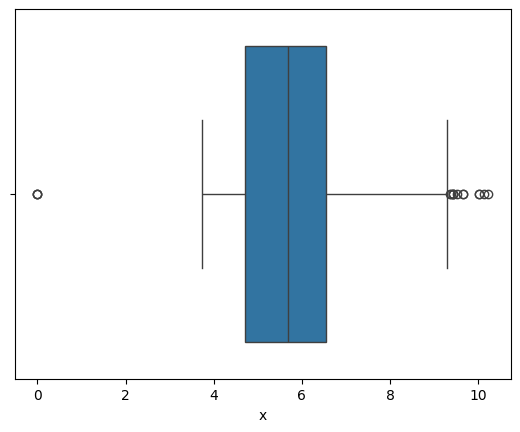

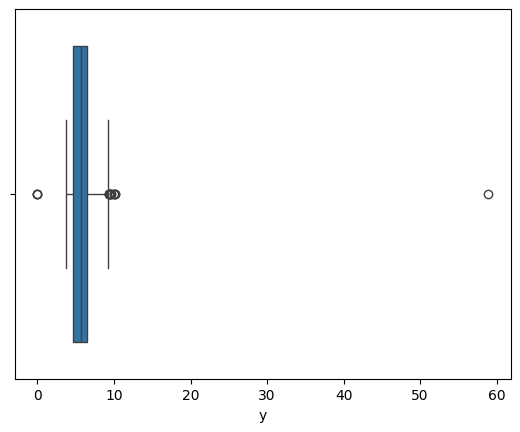

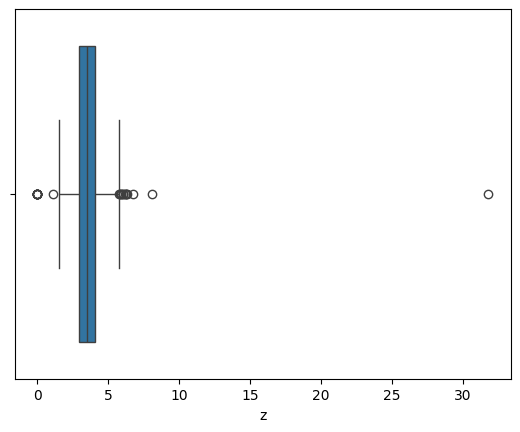

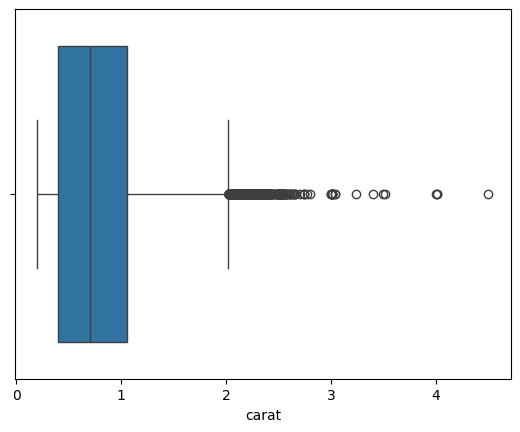

In [11]:
for i in ["x",'y','z','carat']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [12]:
new_df = df[(df['x'] >= 3.5)]
new_df = new_df[(df['y'] <= 15)]
new_df = new_df[(df['z'] <= 10)]


/var/folders/05/kdcv96nj15zc2vqk988776n00000gn/T/ipykernel_10029/3688494583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[(df['y'] <= 15)]
/var/folders/05/kdcv96nj15zc2vqk988776n00000gn/T/ipykernel_10029/3688494583.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = new_df[(df['z'] <= 10)]


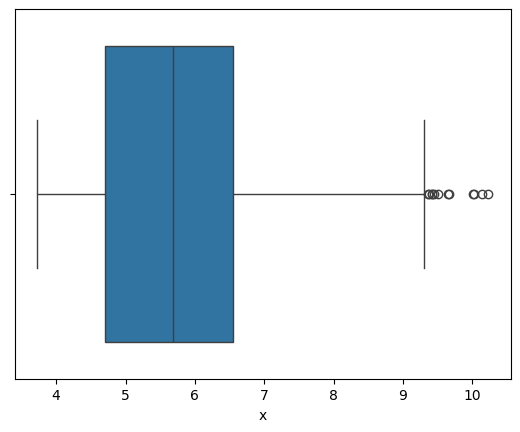

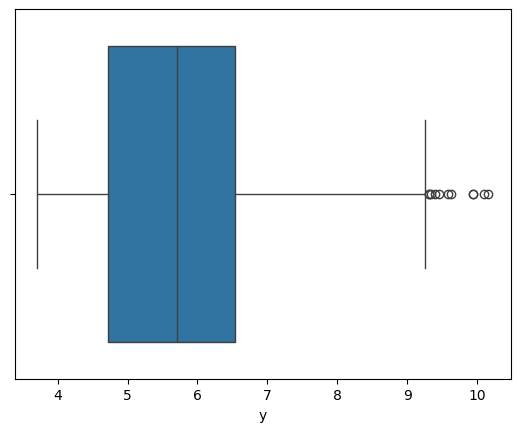

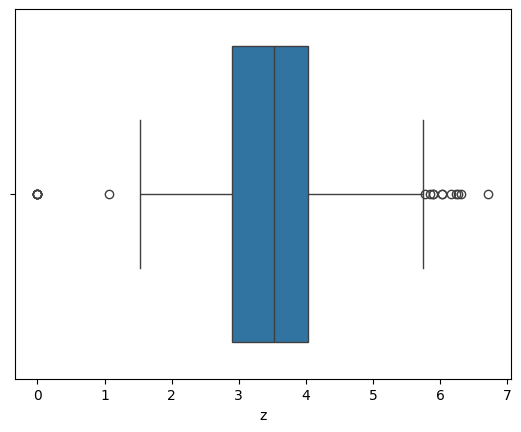

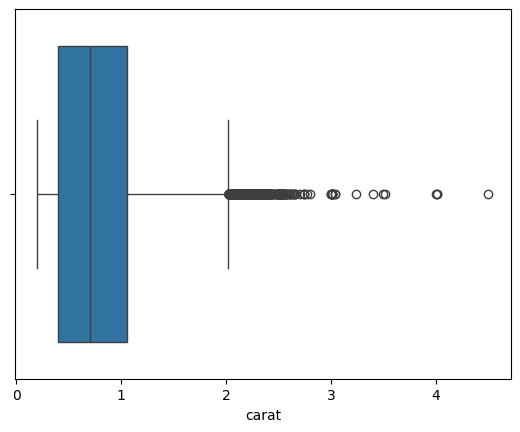

In [13]:
for i in ["x",'y','z','carat']:
    sns.boxplot(data=new_df,x=i)
    plt.show()

In [14]:
new_df.shape

(26962, 8)

In [15]:
dic = {}
for i,j in enumerate(['D','E', 'F', 'G',  'H', 'I','J']):
    dic[j] = i+1
dic

{'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}

In [16]:
new_df['color'] = new_df['color'].map(dic)

In [17]:
dic = {}
for i,j in enumerate(['Fair','Good', 'Very Good', 'Premium',  'Ideal']):
    dic[j] = i+1
dic

{'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

In [18]:
new_df['cut'] = new_df['cut'].map(dic)

In [19]:
dic = {}
for i,j in enumerate(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']):
    dic[j] = i+1
dic

{'I1': 1,
 'SI2': 2,
 'SI1': 3,
 'VS2': 4,
 'VS1': 5,
 'VVS2': 6,
 'VVS1': 7,
 'IF': 8}

In [20]:
new_df['clarity'] = new_df['clarity'].map(dic)

In [21]:
new_df.head()

,carat,cut,color,clarity,x,y,z,price
0,0.30,5,2,3,4.27,4.29,2.66,499
1,0.33,4,4,8,4.42,4.46,2.70,984
2,0.90,3,2,6,6.04,6.12,3.78,6289
3,0.42,5,3,5,4.82,4.80,2.96,1082
4,0.31,5,3,7,4.35,4.43,2.65,779


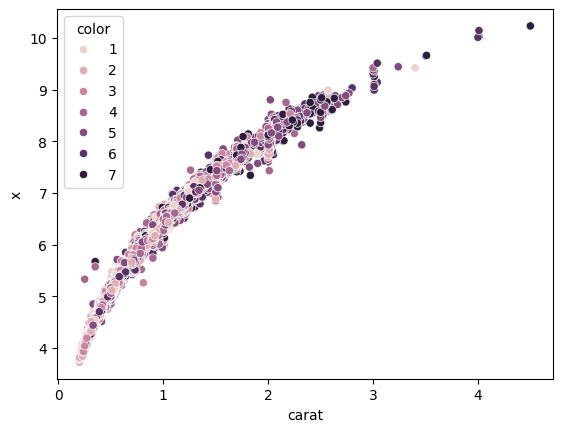

In [22]:
sns.scatterplot(data=new_df,x="carat",y="x",hue='color')
plt.show()

In [23]:
new_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
x          0
y          0
z          0
price      0
dtype: int64

In [24]:
from sklearn.metrics import r2_score

In [25]:
X = new_df.drop(columns=["price"])
y = new_df['price']

In [26]:
train_x, test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=62)

In [27]:
train_x.shape,test_x.shape

((21569, 7), (5393, 7))

In [28]:
train_y.shape,test_y.shape

((21569,), (5393,))

In [29]:
mod = LinearRegression()


In [30]:
mod.fit(train_x,train_y)

LinearRegression()

In [31]:
mod.coef_

array([10894.35569945,   150.36630646,  -328.82026143,   497.89735382,
       -2309.90914259,  2000.96300346,  -961.74540241])

In [32]:
mod.intercept_

-1005.3926021780894

In [48]:
train_x.head(2)

,carat,cut,color,clarity,x,y,z
14379,1.17,2,6,3,6.91,6.83,4.12
11823,0.30,1,3,4,4.25,4.22,2.77


In [34]:
1.17*10894.35569945+	2*150.36630646+	6*-328.82026143+3*497.89735382+	6.91*-2309.90914259+6.83*2000.96300346+4.12*-961.74540241+(-1005.3926021780894)

5305.220752384108

In [49]:
mod.predict([[1.17,	2	,6,	3,	6.91,	6.83,	4.12],[0.30,	1	,3,	4,	4.25,	4.22,	2.77]])

/Users/pradhumncharde/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5305.22075238, -618.67570097])

In [50]:
train_y

14379     4586
11823      776
26842     1760
18730    11081
23161      666
         ...  
2164      2840
8076      3048
9812     13596
15387      687
9749       540
Name: price, Length: 21569, dtype: int64

In [35]:
mod.predict(train_x)

array([ 5305.22075238,  -618.67570097,  2082.63316314, ...,
       10461.68493236,   418.33408899,  -594.60300388])

In [36]:
r2_score(mod.predict(test_x),test_y)*100

89.91263283810159

In [37]:
mod2 = XGBRegressor()

In [38]:
mod2.fit(train_x,train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
r2_score(mod2.predict(test_x),test_y)*100

97.74464398230431

In [40]:
import pickle
import joblib

In [41]:
joblib.dump(mod2,"model.pkl")

['model.pkl']

In [42]:
train_x.head()

,carat,cut,color,clarity,x,y,z
14379,1.17,2,6,3,6.91,6.83,4.12
11823,0.30,1,3,4,4.25,4.22,2.77
26842,0.63,1,5,5,5.65,5.70,3.25
18730,1.23,3,4,7,6.90,6.94,4.23
23161,0.33,4,4,5,4.41,4.47,2.77


In [43]:
df.describe()

,carat,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.128516,1.166058,0.720624,4024.864666
min,0.200000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,10.230000,58.900000,31.800000,18818.000000


In [44]:
import joblib

In [45]:
joblib.dump(mod2,file)

NameError: name 'file' is not defined